# Analysis of the Movies Data Set
<br>
by Shynar Akhmetova
<br>

**Research question**: What are potential factors associated with movie's gross revenue in the period of 1980-2016?
<br>
<br>
Outline of the notebook:
<br>
(1) Cleaning of data
<br>
(2) Association between movie budget and its gross revenue
<br>
(3) The most and the least successful production companies across decades
<br>
(4) The most and the least successful genres across decades
<br>
(5) Countries ranked according to number of movies produced
<br>
(6) Association between movie revenue and its score

**Used datasets**: There are 6820 movies in the dataset (220 movies per year, 1980-2020), retrieved from [this website](https://www.kaggle.com/datasets/danielgrijalvas/movies)
<br>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [74]:
# Setting all figure size to single universal one
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [4]:
#Reading the data
movies_df = pd.read_csv(r'C:\Users\Akhmetova_Shynar\Desktop\PortfolioProject\movies.csv')

In [5]:
movies_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


# (1) Cleaning data

In [6]:
# Detecting missing data
for col in movies_df.columns:
    print('{} - {}%'.format(col, np.mean(movies_df[col].isnull())))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# Filling in NA values in Budget and Gross with means
movies_df['budget'].fillna(np.mean(movies_df['budget']),inplace=True)
movies_df['gross'].fillna(np.mean(movies_df['gross']),inplace=True)

In [8]:
# Identifying data types for columns
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [9]:
# Converting Budget and Gross data types to integer
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df['gross'] = movies_df['gross'].astype('int64')

In [10]:
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [11]:
# Creating separate columns for release country and year
movies_df['release_state'] = movies_df['released'].astype(str).apply(lambda x: x[x.find('(')+1:x.find(')')])
movies_df['release_year'] = movies_df['released'].astype(str).apply(lambda x: x[x.find(',')+1:x.find(',')+6])
movies_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_state,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.0,United States,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0,United States,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,NaN,Cameroon,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.0,United States,2020


Text(0.5, 1.0, 'Correlation matrix for numeric features (Pearson)')

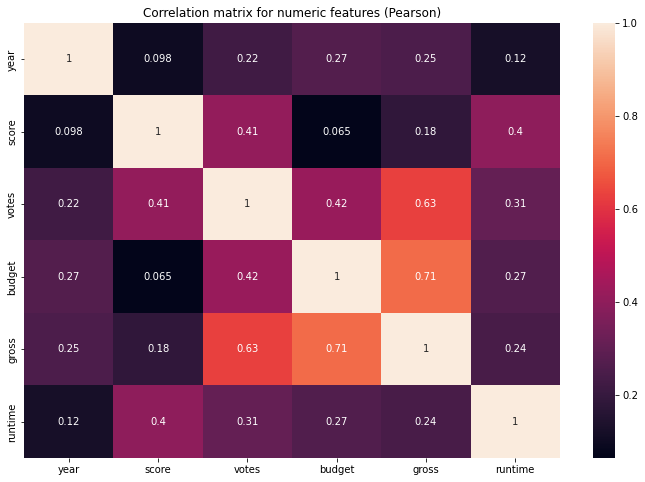

In [12]:
# Plotting the heatmap of correlation for the data set
corr_matrix = movies_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation matrix for numeric features (Pearson)')

# (2) Association between gross revenue and budget

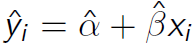
This formula represents linear regression where
<br>
*$y_{i}$* represents estimated gross revenue for observation *i*
<br>
*α* - estimated intercept coefficient
<br>
*β* - estimated budget coefficient
<br>
*$x_{i}$* - x value for observation *i*

In [13]:
# Ranking movies according to their gross revenue
movies_df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_state,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0,United States,2001
7625,The Untold Story,NaN,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0,United States,2019
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0,United States,2020
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,Japan,1993


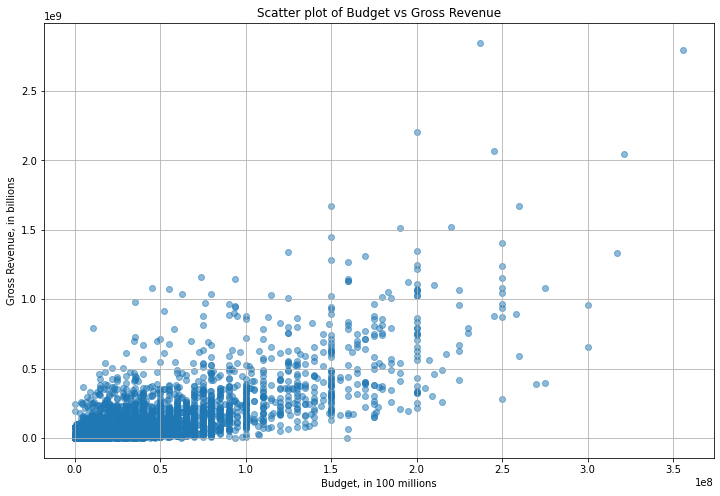

In [14]:
# Visualizing data for the preliminary analysis using the scatter plot
plt.scatter(movies_df['budget'], movies_df['gross'], alpha=0.5)
plt.xlabel('Budget, in 100 millions')
plt.ylabel('Gross Revenue, in billions')
plt.title('Scatter plot of Budget vs Gross Revenue')
plt.grid(True);

In [15]:
# Performing the linear regression analysis
slope_lin_b, intercept_lin_b, r_value_lin_b, p_value_lin_b, std_err_lin_b = stats.linregress(movies_df['budget'], movies_df['gross'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Gross Revenue, in billions')

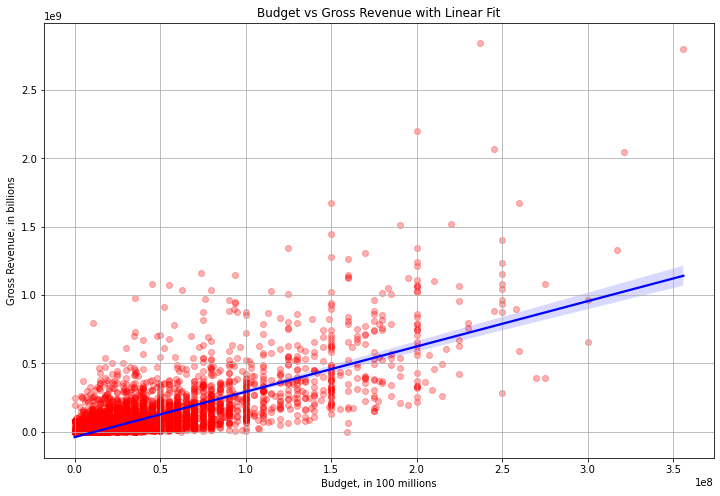

In [16]:
# Plotting linear regression of budget vs gross using seaborn
sns.regplot('budget', 'gross', data=movies_df, scatter_kws={'alpha':0.3,'color':'red'}, line_kws={'color':'blue'})
plt.grid(True)
plt.title('Budget vs Gross Revenue with Linear Fit')
plt.xlabel('Budget, in 100 millions')
plt.ylabel('Gross Revenue, in billions')

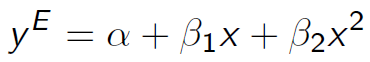
This formula represents quadratic polynomial regression where
<br>
*$y^{E}$* stands for estimated gross revenue
<br>
*α* - estimated intercept coefficient
<br>
*$β_{1}$* - estimated coefficient for x (no meaning)
<br>
*$β_{2}$* - estimated budget coefficient

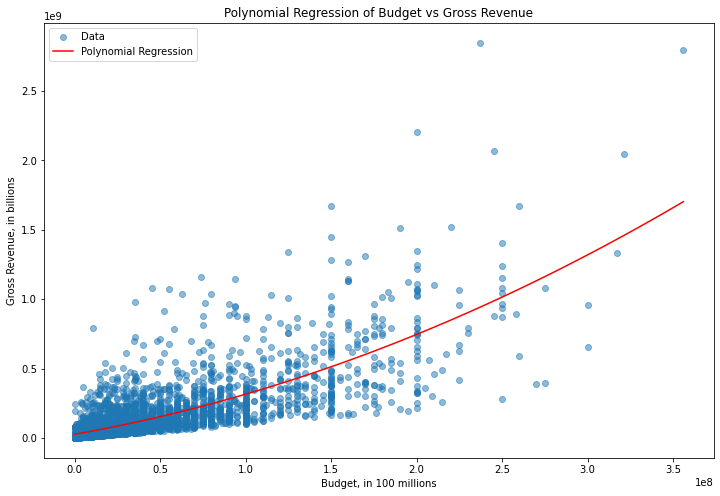

In [104]:
# Performing the polynomial regression analysis
X = movies_df['budget'].values.reshape(-1, 1) #independent variable
y = movies_df['gross'].values #dependent variable

degree = 2 #quadratic polynomial regression

# Generating polynomial features from the independent variable
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fitting a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Generating predicted values of the dependent variable
y_pred = poly_reg.predict(X_poly)

# Generating the same values for smoother curve
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth_pred = poly_reg.predict(X_smooth_poly)

# Visualizing the polynomial regression against the data
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X_smooth, y_smooth_pred, color='r', label='Polynomial Regression')
plt.xlabel('Budget, in 100 millions')
plt.ylabel('Gross Revenue, in billions')
plt.legend()
plt.title('Polynomial Regression of Budget vs Gross Revenue');

In [18]:
# Calculating polynomial regression coefficients, intercept, R-squared, standard errors, and p-value
coefficients_pol_b = poly_reg.coef_
intercept_pol_b = poly_reg.intercept_
r_squared_pol_b = r2_score(y, y_pred)
X_poly_with_constant = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly_with_constant).fit()
p_value_pol_b = model.pvalues[-1]
std_err_poly_b = model.bse

In [19]:
# Comparing results from two regression models in the dataframe
results_budget = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Intercept': [intercept_lin_b, intercept_pol_b],
    'Coefficient': [slope_lin_b, coefficients_pol_b[-1]],
    'R-squared': [r_value_lin_b**2, r_squared_pol_b],
    'Standard Error': [std_err_lin_b, std_err_poly_b[-1]],
    'P-value': [p_value_lin_b, p_value_pol_b],
})

In [20]:
results_budget

,Model,Intercept,Coefficient,R-squared,Standard Error,P-value
0,Linear Regression,-3.953639e+07,3.316587e+00,0.505906,3.743496e-02,0.000000e+00
1,Polynomial Regression,6.276860e+06,1.253952e-08,0.552619,3.280422e-10,2.028808e-260


According to this analysis, both linear and quadratic regressions produce statistically significant coefficients, meaning that there is a possible correlation between budget and corresponding gross revenue. However, the polynomial regression seems to have smaller standard error and better R-squared, i.e., 55.26% of variation within the data is explained by this regression.

If we chose the the quadratic regression model, the interpretation of the coefficient would look like this:
<br>
*Gross revenue is expected to be higher by approximately 1.25e-08 units, on average, for every $1 increase in budget.*

# (3) The most and the least successful production companies across decades

In [21]:
# Calculating revenue for each movie
movies_df['revenue'] = movies_df['gross'] - movies_df['budget']

In [22]:
# Categorizing each movie according to the decade
movies_df['decade'] = (movies_df['year'] // 10) * 10
movies_df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_state,release_year,revenue,decade
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,United States,1980,27998772,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,United States,1980,54353106,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,United States,1980,520375067,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,United States,1980,79953539,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,United States,1980,33846344,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,NaN,90.0,United States,2020,78493541,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0,United States,2020,42910665,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,NaN,Cameroon,2020,78441791,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,78500541,NaN,120.0,United States,2020,78485541,2020


In [75]:
# Creating a separate dataframe containing company name and its revenue for each decade
company_decade_revenue = (
    movies_df.groupby(['company', 'decade'])['revenue']
    .sum()
    .reset_index()
)

# Setting 'decade' as an index before pivoting
company_decade_revenue = company_decade_revenue.set_index(['company', 'decade'])

# Pivoting the DataFrame for a more readable format
company_decade_revenue_pivot = company_decade_revenue.unstack(fill_value=0)

# Resetting the index for a cleaner DataFrame
company_decade_revenue_pivot.reset_index(inplace=True)

# Converting revenue to millions USD
company_decade_revenue_pivot['revenue'] = (company_decade_revenue_pivot['revenue'] / 1_000_000).round(2)

company_decade_revenue_pivot.rename(columns={'revenue':'revenue in millions USD'}, inplace=True)

In [76]:
company_decade_revenue_pivot

company revenue in millions USD        \
decade                                                         1980  1990   
0           "DIA" Productions GmbH & Co. KG                     0.0  0.00   
1       "Weathering With You" Film Partners                     0.0  0.00   
2                           .406 Production                     0.0 -0.24   
3                        1+2 Seisaku Iinkai                     0.0  0.00   
4                           10 West Studios                     0.0  0.00   
...                                     ...                     ...   ...   
2380                             i am OTHER                     0.0  0.00   
2381                               i5 Films                     0.0  0.00   
2382               iDeal Partners Film Fund                     0.0  0.00   
2383                            micro_scope                     0.0  0.00   
2384                                thefyzz                     0.0  0.00   

                            
decade   2000    2010 2020  
0        8.35    0.00  0.0  
1        0.00  182.36  0.0  
2        0.00    0.00  0.0  
3      -34.39    0.00  0.0  
4        0.00  -34.77  0.0  
...       ...     ...  ...  
2380     0.00   10.99  0.0  
2381     7.03    0.00  0.0  
2382     0.00  -35.08  0.0  
2383     0.00    0.30  0.0  
2384     0.00   56.90  0.0  

[2385 rows x 6 columns]

In [39]:
# Creating a separate dataframe for top 5 production companies in terms of total revenue

top_companies = (
    company_decade_revenue_pivot.sum(axis=1)  # Summing across decades
    .sort_values(ascending=False)
    .head(5)
    .index
)

top5_df = company_decade_revenue_pivot.loc[top_companies]

top5_df = top5_df.reset_index()

top5_df

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_6848\3133343715.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  company_decade_revenue_pivot.sum(axis=1)  # Sum across decades


index                company revenue in millions, USD           \
decade                                                  1980     1990   
0       2319           Warner Bros.                  1018.93  4690.70   
1       2281     Universal Pictures                  2247.57  5811.61   
2       2253  Twentieth Century Fox                   566.26  6026.81   
3        731      Columbia Pictures                   709.00  2205.88   
4       1812     Paramount Pictures                  3846.50  4000.59   

                                    
decade      2000      2010    2020  
0       13755.97  16131.72  158.66  
1       10107.31  16557.10  206.64  
2       10279.40  10806.70    0.00  
3       10530.72  12647.03  336.51  
4        5686.48  11621.19  234.72

In [61]:
# Creating another, less readable dataframe with top 5 production companies and their revenue for each decade for further plotting
top_companies = (
    movies_df
    .groupby(["company"])
    ["revenue"]
    .sum()
    .nlargest(5)
    .index
)
top_company_revenues = (
    movies_df
    .query("company.isin(@top_companies)")
    .groupby(["company", "decade"])
    ["revenue"]
    .sum()
    .reset_index()
)

top_company_revenues = top_company_revenues.query("decade != 2020") #Dropping 2020 decade since most values are too small

<AxesSubplot:xlabel='decade', ylabel='revenue'>

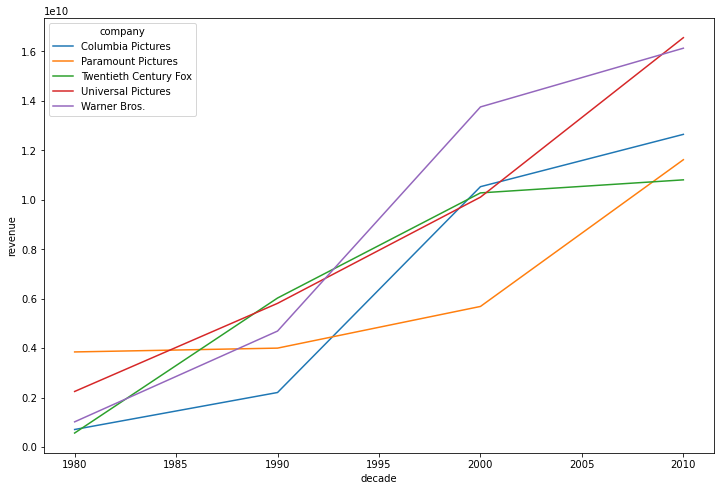

In [63]:
# Plotting revenue progress for top 5 production companies across decades
sns.lineplot(x="decade", y="revenue", hue="company", data=top_company_revenues)

In [40]:
# Creating a separate dataframe for worst 5 production companies in terms of total revenue
worst_companies = (
    company_decade_revenue_pivot.sum(axis=1)  # Sum across decades
    .sort_values(ascending=True)
    .head(5)
    .index
)

worst5_df = company_decade_revenue_pivot.loc[worst_companies]

worst5_df = worst5_df.reset_index()

worst5_df

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_6848\517601872.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  company_decade_revenue_pivot.sum(axis=1)  # Sum across decades


index                     company revenue in millions, USD          \
decade                                                       1980    1990   
0       1146                     Gaumont                   -99.66 -171.02   
1        626          Channel Four Films                    18.35 -357.24   
2       1720          New World Pictures                  -291.45   -6.35   
3        305                   BBC Films                     0.00  -64.14   
4        483  British Screen Productions                   -51.82 -214.93   

                            
decade   2000    2010 2020  
0      -64.60  -41.32  0.0  
1        0.00    0.00  0.0  
2        0.00    0.00  0.0  
3      -15.12 -188.96  0.0  
4        0.00    0.00  0.0

# (4) The most and the least successful genres across decades

In [51]:
# Creating a separate dataframe containing genre name and its revenue for each decade
genre_decade_revenue = (
    movies_df.groupby(['genre', 'decade'])['revenue']
    .sum()
    .reset_index()
)

# Setting 'decade' as an index before pivoting
genre_decade_revenue = genre_decade_revenue.set_index(['genre', 'decade'])

# Pivoting the dataFrame for a more readable format
genre_decade_revenue_pivot = genre_decade_revenue.unstack(fill_value=0)

# Resetting the index for a cleaner dataFrame
genre_decade_revenue_pivot.reset_index(inplace=True)

# Converting revenue to billions USD
genre_decade_revenue_pivot['revenue'] = (genre_decade_revenue_pivot['revenue'] / 1_000_000_000).round(2)

genre_decade_revenue_pivot.rename(columns={'revenue':'revenue in billions, USD'}, inplace=True)

# Creating a new column called 'total revenue'
genre_decade_revenue_pivot['total revenue'] = genre_decade_revenue_pivot.iloc[:, 1:].sum(axis=1)

genre_decade_revenue_pivot

genre revenue in billions, USD                             \
decade                                1980   1990   2000   2010  2020   
0          Action                     6.53  17.83  41.22  86.15  1.44   
1       Adventure                     0.93   1.89   9.83  15.25  0.05   
2       Animation                     0.39   4.70  15.45  36.28  0.31   
3       Biography                     0.25  -0.01   2.78   5.97  0.00   
4          Comedy                     1.40   6.03  19.43  14.13  0.05   
5           Crime                    -0.53   1.61   4.00   2.75 -0.04   
6           Drama                    -1.14   4.36   6.45   8.01  0.52   
7          Family                     0.67  -0.03  -0.00   1.07  0.00   
8         Fantasy                     0.17   0.27   0.33   0.19  0.00   
9         History                     0.08   0.00   0.00   0.00  0.00   
10         Horror                     0.69   0.95   3.08   5.54  0.01   
11          Music                    -0.04   0.00   0.00   0.00  0.00   
12        Musical                     0.00   0.00   0.00  -0.07  0.00   
13        Mystery                    -0.02   0.27   0.74   0.39  0.00   
14        Romance                     0.03  -0.03  -0.04   0.08  0.00   
15         Sci-Fi                     0.01   0.00  -0.04   0.13  0.08   
16          Sport                     0.00   0.00   0.00  -0.03  0.00   
17       Thriller                     0.00   0.03   0.15   0.12  0.00   
18        Western                    -0.03   0.01   0.00   0.00  0.00   

       total revenue  
decade                
0             153.17  
1              27.95  
2              57.13  
3               8.99  
4              41.04  
5               7.79  
6              18.20  
7               1.71  
8               0.96  
9               0.08  
10             10.27  
11             -0.04  
12             -0.07  
13              1.38  
14              0.04  
15              0.18  
16             -0.03  
17              0.30  
18             -0.02

Text(0.5, 1.0, 'Genre Distribution of Revenue for 1980-2020 period')

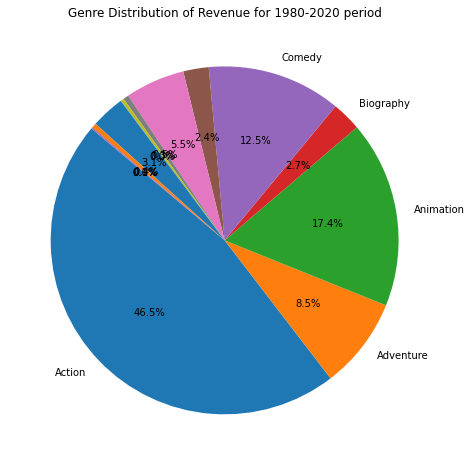

In [78]:
# Plotting a pie chart
positive_genre_revenue = genre_decade_revenue_pivot[genre_decade_revenue_pivot['total revenue']>0] #dropping negative values
top5_genres = positive_genre_revenue.head(5)
labels = top5_genres['genre'].tolist() + [''] * (len(positive_genre_revenue) - len(top5_genres)) #labelling only top 5 genres
plt.pie(positive_genre_revenue['total revenue'], labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution of Revenue for 1980-2020 period')

# (5) The ranking of countries according to number of movies produced

In [67]:
# Creating a separate dataframe containing country name and its production number for each decade
country_decade_stats = (
    movies_df.groupby(['release_state', 'decade'])['revenue']
    .size()
    .reset_index(name='number of movies')
)

# Pivoting the dataFrame for a more readable format
country_decade_stats_pivot = country_decade_stats.pivot(index='release_state', columns='decade', values='number of movies').fillna(0)

# Resetting the index for a cleaner DataFrame
country_decade_stats_pivot.reset_index(inplace=True)

country_decade_stats_pivot

decade,release_state,1980,1990,2000,2010,2020
0,Argentina,4.0,2.0,4.0,3.0,0.0
1,Australia,11.0,9.0,9.0,19.0,0.0
2,Austria,0.0,0.0,1.0,0.0,0.0
3,Bahamas,0.0,0.0,0.0,1.0,0.0
4,Bahrain,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
57,Uruguay,1.0,0.0,0.0,0.0,0.0
58,Vietnam,0.0,0.0,0.0,1.0,0.0
59,West Germany,6.0,0.0,0.0,0.0,0.0
60,Yugoslavia,1.0,0.0,0.0,0.0,0.0


In [70]:
# Creating a separate dataframe with top 10 countries in terms of number of movies produced
top10_countries = (
    country_decade_stats_pivot.sum(axis=1)  # Sum across decades
    .sort_values(ascending=False)
    .head(10)
    .index
)

top10_countries_df = country_decade_stats_pivot.loc[top10_countries]

top10_countries_df = top10_countries_df.reset_index()

top10_countries_df

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_6848\2907118554.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  country_decade_stats_pivot.sum(axis=1)  # Sum across decades


decade,index,release_state,1980,1990,2000,2010,2020
0,56,United States,1530.0,1846.0,1700.0,1636.0,23.0
1,55,United Kingdom,20.0,33.0,54.0,90.0,0.0
2,16,France,20.0,38.0,47.0,43.0,0.0
3,1,Australia,11.0,9.0,9.0,19.0,0.0
4,17,Germany,0.0,10.0,21.0,15.0,0.0
5,28,Japan,10.0,8.0,14.0,12.0,0.0
6,9,Canada,7.0,5.0,8.0,12.0,0.0
7,22,India,0.0,1.0,14.0,16.0,0.0
8,48,Spain,3.0,4.0,16.0,8.0,0.0
9,27,Italy,6.0,12.0,11.0,1.0,0.0


# (6) Association between movie revenue and its score

In [72]:
# Calculating the average revenue for each score
average_revenue_per_score = movies_df.groupby('score')['revenue'].mean().reset_index()

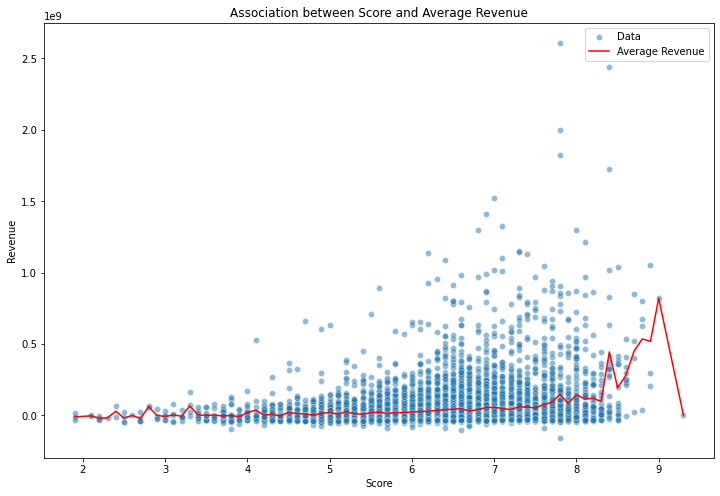

In [73]:
# Plotting the scatter plot
sns.scatterplot(x='score', y='revenue', data=movies_df, alpha=0.5, label='Data')
sns.lineplot(x='score', y='revenue', data=average_revenue_per_score, color='red', label='Average Revenue')
plt.title('Association between Score and Average Revenue')
plt.xlabel('Score')
plt.ylabel('Revenue')
plt.legend()

In [97]:
# Dropping rows with missing values in 'score' or 'revenue' columns
movies_df = movies_df.dropna(subset=['score', 'revenue'])

# Converting 'score' and 'revenue' columns to numeric
movies_df['score'] = pd.to_numeric(movies_df['score'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

# Performing the linear regression analysis
slope_lin_s, intercept_lin_s, r_value_lin_s, p_value_lin_s, std_err_lin_s = stats.linregress(movies_df['score'], movies_df['revenue'])

C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_6848\2475960419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['score'] = pd.to_numeric(movies_df['score'], errors='coerce')
C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_6848\2475960419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
C:\Users\Akhmetova_Shynar\AppData\Local\Temp\ipykernel_6848\2475960419.py:7: SettingWithCopyWarning: 
A value is tryin

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Revenue, in billions USD')

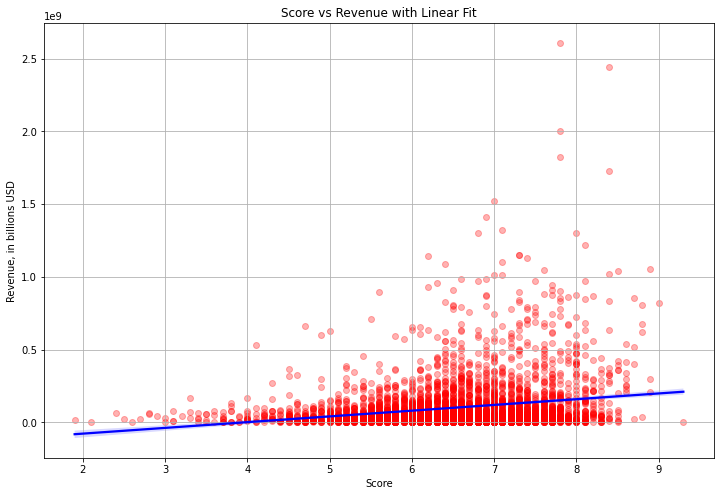

In [101]:
# Plotting linear regression of score vs revenue using seaborn
sns.regplot('score', 'revenue', data=movies_df, scatter_kws={'alpha':0.3,'color':'red'}, line_kws={'color':'blue'})
plt.grid(True)
plt.title('Score vs Revenue with Linear Fit')
plt.xlabel('Score')
plt.ylabel('Revenue, in billions USD')

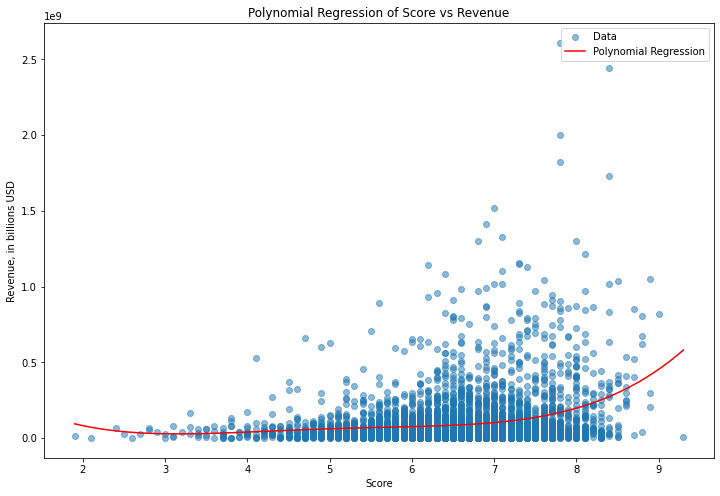

In [122]:
# Performing the polynomial regression analysis
X = movies_df['score'].values.reshape(-1, 1) #independent variable
y = movies_df['revenue'].values #dependent variable

degree = 4

# Generating polynomial features from the independent variable
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fitting a polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

# Generating predicted values of the dependent variable
y_pred = poly_reg.predict(X_poly)

# Generating the same values for smoother curve
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly_features.transform(X_smooth)
y_smooth_pred = poly_reg.predict(X_smooth_poly)

# Visualizing the polynomial regression against the data
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X_smooth, y_smooth_pred, color='r', label='Polynomial Regression')
plt.xlabel('Score')
plt.ylabel('Revenue, in billions USD')
plt.legend()
plt.title('Polynomial Regression of Score vs Revenue');

In [123]:
# Calculating polynomial regression coefficients, intercept, R-squared, standard errors, and p-value
coefficients_pol_s = poly_reg.coef_
intercept_pol_s = poly_reg.intercept_
r_squared_pol_s = r2_score(y, y_pred)
X_poly_with_constant = sm.add_constant(X_poly)
model = sm.OLS(y, X_poly_with_constant).fit()
p_value_pol_s = model.pvalues[-1]
std_err_poly_s = model.bse

In [124]:
# Comparing results from two regression models in the dataframe
results_score = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression'],
    'Intercept': [intercept_lin_s, intercept_pol_s],
    'Coefficient': [slope_lin_s, coefficients_pol_s[-1]],
    'R-squared': [r_value_lin_s**2, r_squared_pol_s],
    'Standard Error': [std_err_lin_s, std_err_poly_s[-1]],
    'P-value': [p_value_lin_s, p_value_pol_s],
})

In [125]:
results_score

,Model,Intercept,Coefficient,R-squared,Standard Error,P-value
0,Linear Regression,-1.568539e+08,3.947164e+07,0.045665,2.845957e+06,9.247761e-43
1,Polynomial Regression,7.843460e+08,1.535573e+06,0.066431,5.511839e+05,5.362076e-03


According to this analysis, both linear and polynomial regressions produce statistically significant coefficients, meaning that there is a possible correlation between movie score and corresponding revenue. However, the polynomial regression seems to have better R-squared, i.e., 6.64% of variation within the data is explained by this regression.

If we chose the the polynomial regression model, the interpretation of the coefficient would look like this:
<br>
*Revenue is expected to be higher by approximately 1,535,573 USD, on average, for every one-unit increase in the score.*